<h1 align="center"> Credit Fraud Detector </h1>
<h3 align="center"> - Jayant Jain </h3>


In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

Each transaction has 30 features, all of which are numerical. The features V1, V2, ..., V28 are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount. The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

##### Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.

# Importing and Reading

In [1]:
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For removing Warnings
import warnings
warnings.filterwarnings('ignore')

# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

#For Accuracry Score
from sklearn.metrics import accuracy_score

#For Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
import itertools

In [24]:
data = pd.read_csv('creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print(df.isnull().sum().max())
print("No Null Values in Data")

0
No Null Values in Data


# Visualizations

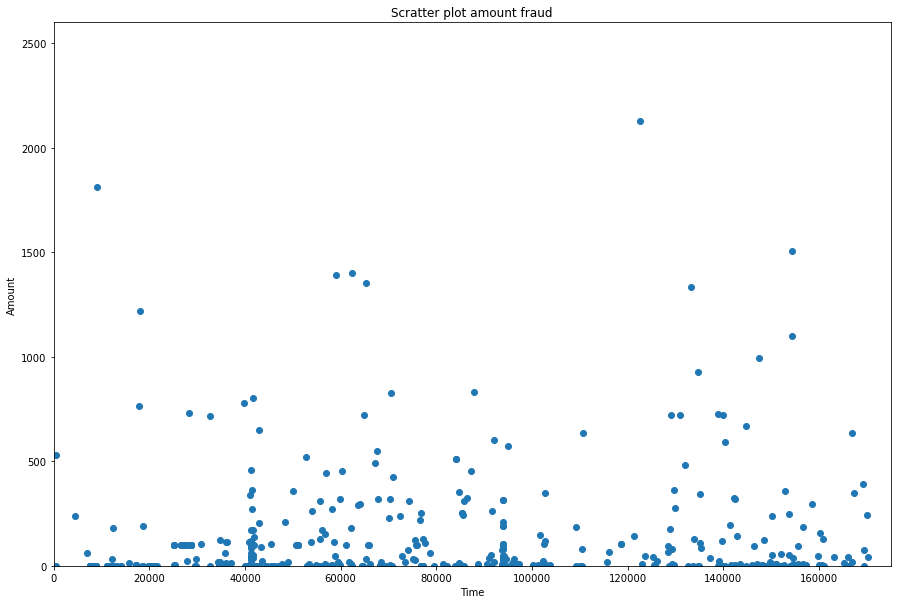

In [5]:
df_fraud = df[df['Class'] == 1] 
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2600])
plt.show()

##### The time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small amounts.

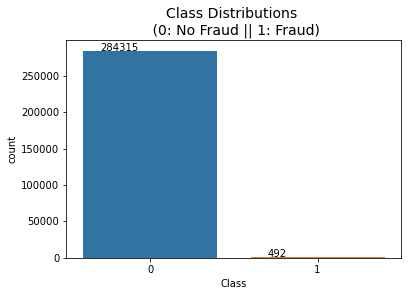

In [6]:
#sns.countplot('Class', data=df)
ax= sns.countplot(x="Class", data=df, order=[0,1])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

# Basic Insights

In [7]:
print('No Frauds', round(df['Class'].value_counts()[0]), 'Transactions of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]), 'Transactions of the dataset')

No Frauds 284315 Transactions of the dataset
Frauds 492 Transactions of the dataset


In [8]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


##### There are only 492 frauds in the dataset, even though there are 284315 no frauds in the dataset.

In [9]:
print("The accuracy of the classifier : "+ str((284315-492)/284315)+ " which is the number of good classification")

The accuracy of the classifier : 0.998269524998681 which is the number of good classification


In [10]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] 
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


# Splitting Data

In [25]:
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']  

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)


In [27]:
print(X_train.shape)
print(X_test.shape)

(227845, 30)
(56962, 30)


# Logistic Regression (Model 1)

In [28]:
from sklearn.linear_model import LogisticRegression 

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.79      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



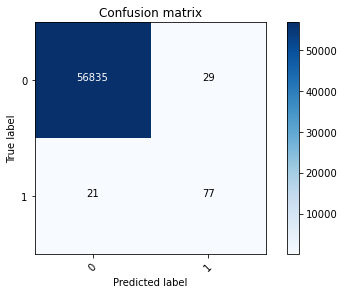

In [30]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [31]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.9991222218320986


# Random Forest (Model 2)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.85      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



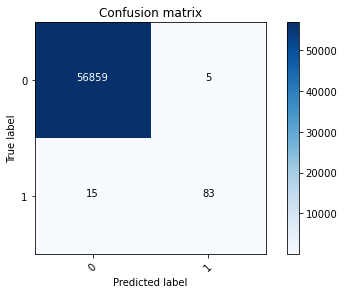

In [33]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [34]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.9996488887328394


# Naive Bayes (Model 3)

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.73      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.86      0.63     56962
weighted avg       1.00      0.99      1.00     56962



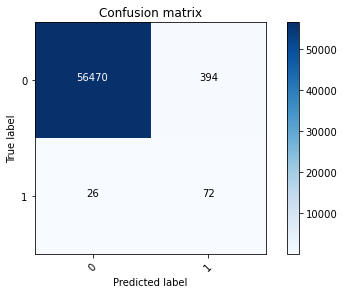

In [36]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [37]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.9926266633896281


# Decision Tree (Model 4)

In [38]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Classifier (4.1)

In [39]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.81      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



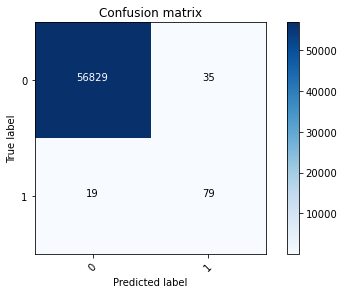

In [40]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [41]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.9990519995786665


### Regression (4.2)

In [42]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [43]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



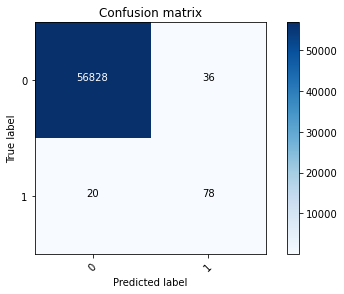

In [44]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [45]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.9990168884519505


# KNN (Model 5)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.10      0.18        98

    accuracy                           1.00     56962
   macro avg       0.95      0.55      0.59     56962
weighted avg       1.00      1.00      1.00     56962



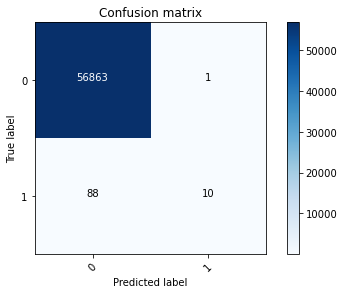

In [47]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [48]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.9984375548611355


# Shuffling Data Due to high Skewness
#### My system was'nt supporting such huge data for SVM Classification so I used this

In [49]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121,77.0,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,1.527192,-0.131506,-1.696914,0.482121,0.586418,0.034541,-0.306278,-0.206030,-0.118939,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,9.12,0
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
239,160.0,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,0.252013,0.740676,0.588884,0.480297,0.799412,-0.592090,0.032839,-1.012363,-0.799293,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,20.00,0
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


In [50]:
X = new_df.drop(labels='Class', axis=1) # Features
y = new_df.loc[:,'Class']  

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [52]:
print(X_train.shape)
print(X_test.shape)

(787, 30)
(197, 30)


#  SVM (Model 6)

In [53]:
from sklearn import svm
clf= svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        99

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



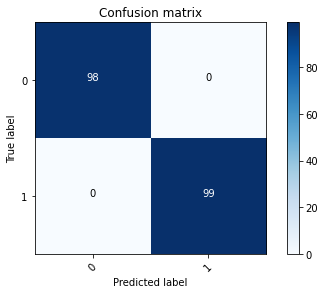

In [54]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])

plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [55]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 1.0


# Conclusion:- 

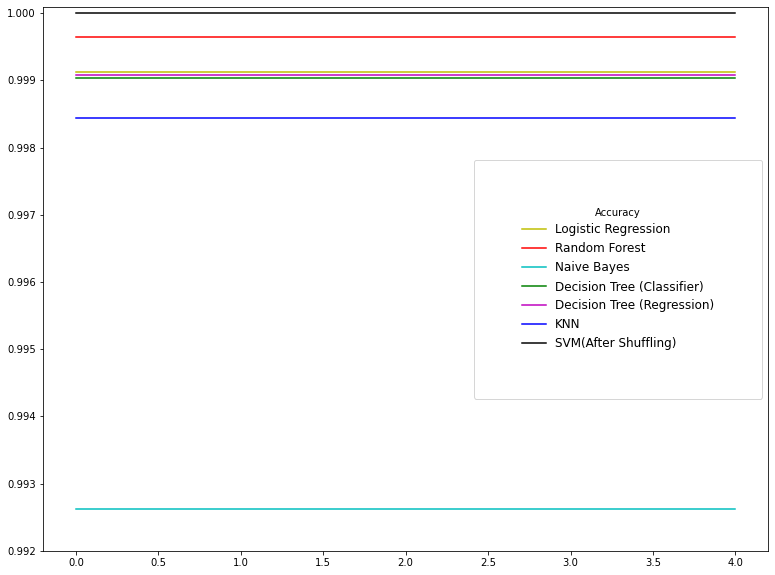

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
x=[0,4]
plt.ylim([0.99200,1.00009])

ylr=[0.9991222218320986,0.9991222218320986]
yrf=[0.9996488887328394,0.9996488887328394]
ynb=[0.9926266633896281,0.9926266633896281]
ydtc=[0.9990344440153085,0.9990344440153085]
ydtr=[0.9990871107053826,0.9990871107053826]
yknn=[0.9984375548611355,0.9984375548611355]
ysvm=[1,1]
plt.plot(x,ylr,'y')
plt.plot(x,yrf,'r')
plt.plot(x,ynb,'c')
plt.plot(x,ydtc,'g')
plt.plot(x,ydtr,'m')
plt.plot(x,yknn,'b')
plt.plot(x,ysvm,'k')
plt.legend(["Logistic Regression","Random Forest","Naive Bayes","Decision Tree (Classifier)","Decision Tree (Regression)","KNN","SVM(After Shuffling)"], loc ="best",borderpad=4,title="Accuracy",fontsize="large")
plt.show()

### Logistic Regression : 99.91%
### Random Forest : 99.964%
### Naive Bayes : 99.262%
### Decision Tree Classifier : 99.903%
### Decision Tree Regression : 99.908%
### KNN : 99.843%
### SVM : 100%

# Maximum Accuracy on "FULL DATA" achieved was 99.96% from Random Forest Algorithm